# Real Estate Clean up

This is a real dataset, and it was downloaded using web scraping techniques. The data contains registers from **Fotocasa** which is one of the most popular real estate websites in Spain. Please, do not do this (web scraping) unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro, and in no case were economic returns obtained from it.

It contains thousands of data from real houses published on the web www.fotocasa.com. Your goal is to extract as much information as possible with the knowledge you have so far about data science, for example what is the most expensive house in the entire dataset?

Let's start with precisely that question... Good luck!

#### Exercise 00. Read the dataset assets/real_estate.csv and try to visualize the table (★☆☆)

In [2]:
import pandas as pd
import numpy  as np
from scipy import stats as sts
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse as elip
import matplotlib.transforms as trns

# This CSV file contains semicolons instead of comas as separator
ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,15331,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,...,0,0,0,0,0,0,"40,45416","-3,70286",NaN,NaN
15331,15332,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,...,0,0,0,0,0,0,"40,36652","-3,48951",NaN,NaN
15332,15333,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,...,0,0,0,0,0,0,"40,57444","-3,92124",NaN,NaN
15333,15334,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,...,0,0,0,0,0,0,"40,36967","-3,48105",NaN,NaN


#### Exercise 01. Which is the most expensive house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address General Street Nº5 is the most expensive and its price is 5000000 USD`

In [3]:
# Get index of the highest price

idx_max = ds['price'].idxmax()

# Get property name, address and price

realEstate_max = ds.loc[idx_max,'realEstate_name']
address_max    = ds.loc[idx_max,'address']
price_max      = ds.loc[idx_max, 'price']

# Print result

print(f"Property with highest price: {realEstate_max} in {address_max} (${price_max})")


Property with highest price: engel volkers torrelodones in El Escorial ($8500000)


#### Exercise 02. Which is the cheapest house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address Concrete Street Nº1 is the cheapest and its price is 12000 USD`

In [4]:
# Get index of the lowest price

idx_min = ds['price'].idxmin()

# Get property name, address and price

realEstate_min = ds.loc[idx_min,'realEstate_name']
address_min    = ds.loc[idx_min,'address']
price_min      = ds.loc[idx_min, 'price']

# Print result

print(f"Property with lowest price: {realEstate_min} in {address_min} (${price_min})")

Property with lowest price: esalje in Parla ($0)


#### Exercise 03. Which is the biggest and the smallest house in the dataset? (★☆☆)

Print both the address and the surface of the selected houses. For example:

`The biggest house is located on Yukka Street Nº10 and its surface is 5000 meters`

`The smallest house is located on County Road 1 N and its surface is 200 meters`

In [5]:
# Get index of the largest and smallest surface

idx_max = ds['surface'].idxmax()
idx_min = ds['surface'].idxmin()

# Get property address and surface

address_max    = ds.loc[idx_max,'address']
address_min    = ds.loc[idx_min,'address']
surface_max    = ds.loc[idx_max,'surface']
surface_min    = ds.loc[idx_min,'surface']

# Print result

print(f"The house with the largest surface is located in {address_max} with a surface of {surface_max} m2")
print(f"The house with the smallest surface is located in {address_min} with a surface of {surface_min} m2")

The house with the largest surface is located in Sevilla la Nueva with a surface of 249000.0 m2
The house with the smallest surface is located in Calle Amparo,  Madrid Capital with a surface of 15.0 m2


#### Exercise 04. How many populations (level5 column) the dataset contains? (★☆☆)

Print the names of the populations with a comma as a separator. For example:

`> print(populations)`

`population1, population2, population3, ...`

In [6]:
# Get all unique location names

locations = ds["level5"].dropna().unique()

# Loop through every location name in the array to print it in the required format

for i in range(1,len(locations)):
    print(locations[i], end=', ')

Fuenlabrada, Boadilla del Monte, Las Rozas de Madrid,  Madrid Capital, Villaviciosa de Odón, Pinto, Valdemoro, Navalcarnero, Pozuelo de Alarcón, Torrejón de Ardoz, Navalagamella, San Sebastián de los Reyes, Rivas-vaciamadrid, Alpedrete, Móstoles, San Fernando de Henares, Coslada, Becerril de la Sierra, Alcalá de Henares, Chinchón, Parla, Alcorcón, El Escorial, Leganés, Pedrezuela, Majadahonda, Villanueva de la Cañada, Villanueva del Pardillo, Torrelodones, Moralzarzal, Mejorada del Campo, Aranjuez, Corpa, Getafe, Velilla de San Antonio, Sevilla la Nueva, San Martín de la Vega, Villalbilla, Collado Villalba, Alcobendas, El Molar (Madrid), Moraleja de Enmedio, Algete, Campo Real, Torrejón de la Calzada, Colmenar Viejo, Valdemorillo, Fuente El Saz de Jarama, Tres Cantos, Arroyomolinos (Madrid), Griñón, Paracuellos de Jarama, Guadarrama, Titulcia, Galapagar, Collado Mediano, Los Molinos, San Lorenzo de El Escorial, Loeches, San Martín de Valdeiglesias, Navas del Rey, Bustarviejo, Manzanare

#### Exercise 05. Does the dataset contain NAs? (★☆☆)

Print a boolean value (`True` or `False`) followed by the rows/cols that contains NAs.

In [7]:
# Remove Unnamed: 0 column

ds = ds.drop(columns=["Unnamed: 0"])

# Check if any NA values exist in the DataFrame

isNA = ds.isnull().any().any()
print(isNA)

# Print rows containing NA values

rowsNA = ds[ds.isnull().any(axis=1)]
print(f"Rows with NA values: {rowsNA}")

# Print columns containing NA values

colsNA = ds.columns[ds.isnull().any(axis=0)].tolist()
print(f"Columns with NA values: {colsNA}")


True
Rows with NA values:        id_realEstates  isNew                    realEstate_name  \
0           153771986  False            ferrari 57 inmobiliaria   
1           153867863  False  tecnocasa fuenlabrada ferrocarril   
2           153430440  False                 look find boadilla   
3           152776331  False  tecnocasa fuenlabrada ferrocarril   
4           153180188  False            ferrari 57 inmobiliaria   
...               ...    ...                                ...   
15330       153901377  False                infocasa consulting   
15331       150394373  False                inmobiliaria pulpon   
15332       153901397  False             tecnocasa torrelodones   
15333       152607440  False                inmobiliaria pulpon   
15334       153901356  False                infocasa consulting   

       phone_realEstate                                       url_inmueble  \
0           912177526.0  https://www.fotocasa.es/es/comprar/vivienda/ma...   
1           9

#### Exercise 06. Delete the NAs of the dataset, if applicable (★★☆)

Print a comparison between the dimensions of the original DataFrame versus the DataFrame after the deletions.

In [8]:
woNAds = ds.dropna(how='any')
print(ds.size), print(woNAds.size)


552060
0


(None, None)

#### Exercise 07. Which is the mean of prices in the population (level5 column) of "Arroyomolinos (Madrid)"? (★★☆)

Print the obtained value.

In [9]:
# Get all indexes that match the location name

locIdx  = ds.index[ds['level5']=="Arroyomolinos (Madrid)"]

# Get data of prices and use the arithmetic mean to get the average price

avgPrice = ds.loc[locIdx,'price'].mean()
stdPrice = ds.loc[locIdx,'price'].std()

print(f'The average property price in Arroyomolinos (Madrid) is: ${avgPrice:.2f} +/- ${stdPrice:.2f}')

The average property price in Arroyomolinos (Madrid) is: $294541.60 +/- $84183.52


#### Exercise 08. Plot the histogram of prices for the population (level5 column) of "Arroyomolinos (Madrid)" and explain what you observe (★★☆)

Print the histogram of the prices and write in the Markdown cell a brief analysis about the plot.

13


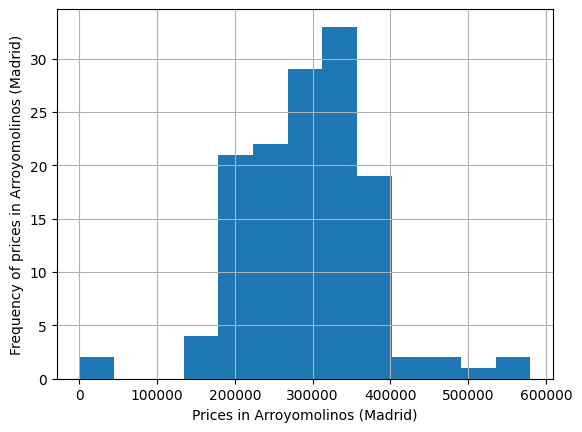

In [10]:
# Get prices

priceLvl5 = ds.loc[locIdx,'price'].tolist()

## Set the number of bins. Use the Freedman-Diaconis rule ##

orderedPriceLvl5 = sorted(priceLvl5)

# Find the Q1, Q2, and Q3

Q2 = np.median(orderedPriceLvl5)
Q1 = np.median(orderedPriceLvl5[0:orderedPriceLvl5.index(Q2)])
Q3 = np.median(orderedPriceLvl5[orderedPriceLvl5.index(Q2):len(orderedPriceLvl5)])

# Compute the IQR

IQR = Q3 - Q1

# Compute the optimal number of bins

h = 2 * IQR * len(orderedPriceLvl5)**(-1/3) # This is the width of the histogram bar

nBins = int(np.round((np.max(orderedPriceLvl5) - np.min(orderedPriceLvl5))/h)) # Number of bins that minimize the difference with the underlying probibility distribution function

print(nBins)

queried = ds[ds['level5'] == "Arroyomolinos (Madrid)"]

# Plot histogram

plt.hist(orderedPriceLvl5,bins=nBins)
plt.xlabel("Prices in Arroyomolinos (Madrid)")
plt.ylabel('Frequency of prices in Arroyomolinos (Madrid)')
plt.grid()
plt.show()

**TODO: Markdown**. To write here, double-click on this cell, remove this content and place the text you want to write. Then, execute the cell.

The prices in the area of Arroyomolinos (Madrid) seem to follow a normal distribution with an average price in the area of $$\text{price}_{\text{Arroyomolinos}} = \mu \pm \sigma = 294541.60 \pm 84183.52 \$ $$

There is also a gap in prices between properties with values 15000 USD and 5000 USD, suggesting that these cheap properties seem to be outliers within the population, as their prices lie outside of $\mu - 3\sigma$. The frequency of high price properties is low sitting at the rightmost tail of the distribution.

#### Exercise 09. Are the average prices of "Valdemorillo" and "Galapagar" the same? (★★☆)

Print both average prices and then write a conclusion about them.

In [11]:
avgPriceValdemorillo = ds[ds['level5']=='Valdemorillo']['price'].mean()
avgPriceGalapagar    = ds[ds['level5']=='Galapagar']['price'].mean()

print(f'{avgPriceValdemorillo:0.2f}'), print(f'{avgPriceGalapagar:0.2f}')

363860.29
360063.20


(None, None)

The average price in Valdemorillo is slight higher than the average price in Galapagar. However, the difference of the average prices only adds up to approximately 4k USD. This suggests that both are comparable areas in terms of prices offering houses of similar quality. Furthermore, based on the histogram obtained in question 8, these two areas are above the average and the median of the price distribution curve.

#### Exercise 10. Are the average prices per square meter (price/m2) of "Valdemorillo" and "Galapagar" the same? (★★☆)

Print both average prices and then write a conclusion about it.

Hint: Create a new column called `pps` (price per square meter) and then analyze the values.

In [12]:
# Computing the price per square meter of each property and finding their mean value in Valdemorillo and Galapagar
# Note that we find the mean of each price/m2. The mean of the division is, in general, not equal to division of 
# the means.

avgPriceM2Valdemorillo = ds[ds['level5']=='Valdemorillo']['price']/ds[ds['level5']=='Valdemorillo']['surface']
avgPriceM2Valdemorillo = avgPriceM2Valdemorillo.mean()
avgPriceM2Galapagar    = ds[ds['level5']=='Galapagar']['price']/ds[ds['level5']=='Galapagar']['surface']
avgPriceM2Galapagar    = avgPriceM2Galapagar.mean()

print(f'{avgPriceM2Valdemorillo:0.2f}'), print(f'{avgPriceM2Galapagar:0.2f}')

1317.95
1606.32


(None, None)

The mean price per square meter of Galapagar is slightly larger than the price per square meter of Valdemorillo by a margin of approximately 300k USD. However, we had seen before that the mean price in Valdemorillo is, conversely, larger than the mean price in Galapagar. Thus, we can conclude that the properties in Valdemorillo are on average larger (in terms of surface area) than the properties in Galapagar.

We verify our assessment in the next piece of code:

In [13]:
# Verify our conclusion on larger properties in Valdemorillo than in Galapagar

avgSurfaceValdemorillo = ds[ds['level5']=='Valdemorillo']['surface'].mean()
avgSurfaceGalapagar    = ds[ds['level5']=='Galapagar']['surface'].mean()

print(f'The mean surface value in Valdemorillo is {avgSurfaceValdemorillo:0.2f} m2')
print(f'The mean surface value in Galapagar is {avgSurfaceGalapagar:0.2f} m2')

The mean surface value in Valdemorillo is 350.02 m2
The mean surface value in Galapagar is 305.52 m2


#### Exercise 11. Analyze the relation between the surface and the price of the houses (★★☆)

Hint: You can make a `scatter plot`, then write a conclusion about it.

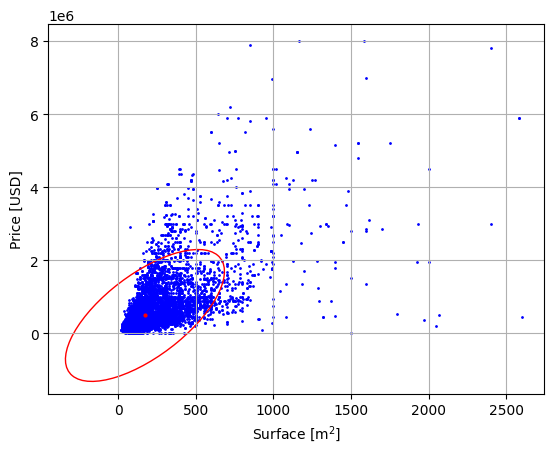

In [14]:
# Create data frame with only the necessary columns to analyze and clean the data from NaN and outliers
# here we chose (3000 m2 as the threshold to trim the data)

priceSurfaceData = ds[['surface','price']]
priceSurfaceData = priceSurfaceData.dropna()
priceSurfaceData = priceSurfaceData[priceSurfaceData['surface']<3000]

# Plot the data in a scatter plot

def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The Axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov     = np.cov(x, y)
    pearson = cov[0,1]/(np.sqrt(cov[0, 0]) * np.sqrt(cov[1, 1]))

    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse      = elip((0,0), width=ell_radius_x, height=ell_radius_y,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.

    scale_x = 2 * np.sqrt(cov[0, 0]) * n_std
    mean_x  = np.mean(x)

    # calculating the standard deviation of y ...
    scale_y = 2 * np.sqrt(cov[1, 1]) * n_std
    mean_y  = np.mean(y)

    transf = trns.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y) \

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

fig, axs = plt.subplots(1, 1)

plt.scatter(priceSurfaceData['surface'],priceSurfaceData['price'],marker='o',c='blue',s=1)
plt.plot(np.mean(priceSurfaceData['surface']),np.mean(priceSurfaceData['price']),marker='o', color='red', markersize=2)
confidence_ellipse(priceSurfaceData['surface'],priceSurfaceData['price'], axs, edgecolor='red')

plt.xlabel('Surface [m$^2$]')
plt.ylabel('Price [USD]')
plt.grid()
plt.show()



The data exhibits a positive correlation as expected, where larger surface area leads to an increase in prices. However, the data cloud seems to form two tails with different slopes, one with steeper price increases for small variations in the surface axis, while in the other, the prices grow less rapidly with increases in the surface axis. Nontheless, most of the data is clustered in the set $$\text{Surface} \times \text{Price} = [0, \enspace 500] \text{ m}^2 \times [0, \enspace 2e6] \text{ USD} $$ for $3 \sigma$, i.e., 99.7 \% of the data as shown in the ellipse with center $\Big(\mu(\text{Surface}),\mu(\text{Price})\Big)$


#### Exercise 12. How many real estate agencies does the dataset contain? (★★☆)

Print the obtained value.

In [15]:
# Group the data per real estate agencies and sum the number of distinct groups

realEstateAgency = ds.groupby(by='realEstate_name').sum()
print(f'There are {len(realEstateAgency)} real estate agencies in the data')

There are 1821 real estate agencies in the data


#### Exercise 13. Which is the population (level5 column) that contains the most houses? (★★☆)

Print both the population and the number of houses.

In [16]:
# Count the data samples in level 5 (locations in Spain)

locationMaxHouses     = ds.value_counts('level5')
print(f'The location with the most houses is {locationMaxHouses.index[0]} with {locationMaxHouses.iloc[0]} properties')

The location with the most houses is  Madrid Capital with 6643 properties


#### Exercise 14. Now let's work with the "south belt" of Madrid. Make a subset of the original DataFrame that contains the following populations (level5 column): "Fuenlabrada", "Leganés", "Getafe", "Alcorcón" (★★☆)

Hint: Filter the original DataFrame using the column `level5` and the function `isin`.

In [17]:
# Check if the 'level5' column contains 'Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón'
locationsToCheck = ['Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón']

# Filter the data frame
southBelt        = ds[ds['level5'].isin(locationsToCheck)]
print(f'Filtered data with the south belt locations:\n {southBelt}')

Filtered data with the south belt locations:
        id_realEstates  isNew                            realEstate_name  \
1           153867863  False          tecnocasa fuenlabrada ferrocarril   
3           152776331  False          tecnocasa fuenlabrada ferrocarril   
85          153152077  False                    sinergical inmobiliaria   
94          153995577  False                            viviendas365com   
109         153586414  False            area uno asesores inmobiliarios   
...               ...    ...                                        ...   
15275       153903887  False  aliseda servicios de gestion inmobiliaria   
15291       151697757  False                                    unipiso   
15305       153902389  False                             jadein ferrero   
15322       153871864  False                          gestion comercial   
15325       153901467  False                              montehogar 68   

       phone_realEstate                              

#### Exercise 15. Make a bar plot of the median of the prices and explain what you observe (you must use the subset obtained in Exercise 14) (★★★)

Print the bar of the median of the prices and write in the Markdown cell a brief analysis about the plot.

[0. 0. 0. 0.]
[155000. 169950. 285305. 179500.]


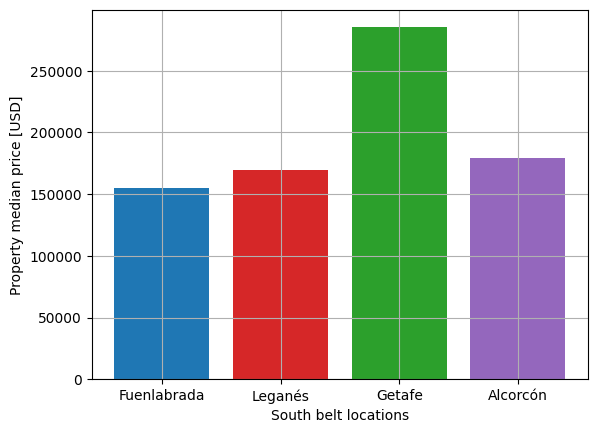

In [18]:
# Get the median prices per location
southBeltGroups      = southBelt.groupby(by='level5')[['price']].apply(lambda x: x)

# Get the median price of each group
southBeltMedianPrice = np.zeros(4) # Set an array of zeros
print(southBeltMedianPrice)
places =  ['Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón'] # Name of places to iterate over (name of the filtered data frame indexes)
for place in places:
    southBeltMedianPrice[places.index(place)] = np.median(southBeltGroups.loc[place,'price'])

# Print the array of data with median prices
print(southBeltMedianPrice)

# Make the bar plot
bar_colors = ['tab:blue', 'tab:red', 'tab:green', 'tab:purple']
plt.subplots()
plt.bar(places,southBeltMedianPrice,color=bar_colors)
plt.xlabel('South belt locations')
plt.ylabel('Property median price [USD]')
plt.grid()
plt.show()


The data show that the area with the highest prices of the south belt is Getafe. Since the median splits the data in two halves, Getafe has the highest midpoint price, suggesting that it also contains the most expensive properties among the south belt locations with a median price of approximately 285.3K USD. Analogously, Alcorcón has the second highest median but much lower than that of Getafe, sitting at around 180.5K USD; in third place is Leganés with 170K USD, and lastly Fuenlabrada with 155K USD. 

The median provides a better idea of the wealth of the area and the property prices than the average because it is not affected by the prices of properties at the extremes of the data.

#### Exercise 16. Calculate the sample mean and variance of the variables: price, rooms, surface area and bathrooms (you must use the subset obtained in Exercise 14) (★★★)

Print both values for each variable.

In [19]:
statsSouthBelt         = southBelt.describe()
filteredStatsSouthBelt = statsSouthBelt[['price','rooms','surface']]

print('The mean of the price [USD], rooms, and surfaces [m2] is: \n')
print(filteredStatsSouthBelt.loc['mean',:])

print('\nThe variance of the price [USD], rooms, and surfaces [m2] is: \n')
print(filteredStatsSouthBelt.loc['std',:]**2)


The mean of the price [USD], rooms, and surfaces [m2] is: 

price      223094.480706
rooms           3.017738
surface       111.752224
Name: mean, dtype: float64

The variance of the price [USD], rooms, and surfaces [m2] is: 

price      1.492137e+10
rooms      7.188859e-01
surface    4.263052e+03
Name: std, dtype: float64


#### Exercise 17. What is the most expensive house in each population? You must use the subset obtained in Exercise 14 (★★☆)

Print both the address and the price of the selected house of each population. You can print a DataFrame or a single line for each population.

In [20]:
# Group data by level5 and keep 'price' and 'adress' columns from the data frame obtained in exercise 14

southBeltGroups = southBelt.groupby(by='level5')[['price','address']].apply(lambda x: x)

# Loop through the different locations
for place in places:
    southBeltPerLoc = southBeltGroups.loc[place,['price','address']].max()
    print(f"The most expensive house in {place} is located in {southBeltPerLoc['address']}. Its price is {southBeltPerLoc['price']} USD\n")
    


The most expensive house in Fuenlabrada is located in Urbanización Urbanización Parque Miraflores, 51, Fuenlabrada. Its price is 490000 USD

The most expensive house in Leganés is located in Plaza Pza España, Gran Oportunidad!!!, Leganés. Its price is 650000 USD

The most expensive house in Getafe is located in San Sebastián, 1, Getafe. Its price is 1050000 USD

The most expensive house in Alcorcón is located in Travesia Nuncio del, Alcorcón. Its price is 950000 USD



#### Exercise 18. Normalize the variable of prices for each population and plot the 4 histograms in the same plot (you must use the subset obtained in Exercise 14) (★★★)

For the normalization method, you can use the one you consider; there is not a single correct answer to this question. Print the plot and write in the Markdown cell a brief analysis about the plot.

Hint: You can help yourself by reviewing the *multihist* demo of Matplotlib.

     norm_price     location
0      0.112632     Alcorcón
1      0.447368     Alcorcón
2      0.261053     Alcorcón
3      0.314737     Alcorcón
4      0.126211     Alcorcón
..          ...          ...
902    0.281633  Fuenlabrada
903    0.281633  Fuenlabrada
904    0.346939  Fuenlabrada
905    0.228571  Fuenlabrada
906    0.438776  Fuenlabrada

[907 rows x 2 columns]


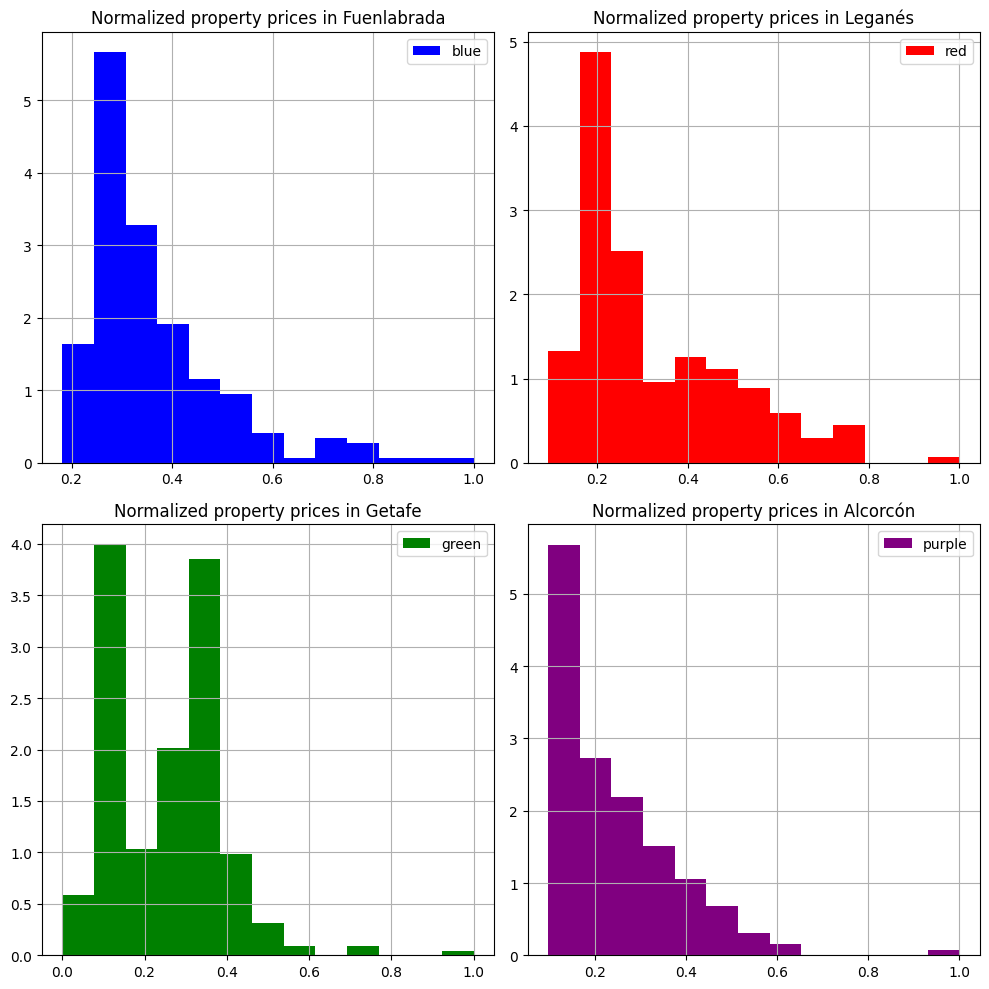

In [ ]:
# Loop through the different locations and normalize the prices
normSouthBeltGroups  = pd.DataFrame() # Define auxiliary dataframe to be populated
for place in places:
    dummySouthBeltGroups               = pd.DataFrame() # In each iteration refresh dummy dataframe
    dummySouthBeltGroups['norm_price'] =  southBeltGroups.loc[place,'price']/southBeltGroups.loc[place,'price'].max() # Normalization with respect to max. 
                                                                                                                      # Since the prices are strictly positive, 
                                                                                                                      # the data has been normalized within the open set (0,1]
    dummySouthBeltGroups['location']   = place
    normSouthBeltGroups                = pd.concat([dummySouthBeltGroups,normSouthBeltGroups],ignore_index=True)
print(normSouthBeltGroups)

# Plot data

# Using the same number of bins as before

fig, ((ax0,ax1),(ax2,ax3)) = plt.subplots(nrows=2,ncols=2,figsize=(10,10))
colors = ['blue', 'red', 'green', 'purple']

# Fuenlabrada 
i = 0
ax0.hist(normSouthBeltGroups[normSouthBeltGroups['location']==str(places[i])]['norm_price'],nBins, density=True, histtype='bar', color=colors[i])
ax0.legend(prop={'size': 10})
ax0.set_title('Normalized property prices in '+str(places[i]))
ax0.grid()

# Leganés
i = 1
ax1.hist(normSouthBeltGroups[normSouthBeltGroups['location']==str(places[i])]['norm_price'],nBins, density=True, histtype='bar', color=colors[i])
ax1.legend(prop={'size': 10})
ax1.set_title('Normalized property prices in '+str(places[i]))
ax1.grid()

# Getafe
i = 2
ax2.hist(normSouthBeltGroups[normSouthBeltGroups['location']==str(places[i])]['norm_price'],nBins, density=True, histtype='bar', color=colors[i])
ax2.legend(prop={'size': 10})
ax2.set_title('Normalized property prices in '+str(places[i]))
ax2.grid()

# Alcorcón
i = 3
ax3.hist(normSouthBeltGroups[normSouthBeltGroups['location']==str(places[i])]['norm_price'],nBins, density=True, histtype='bar', color=colors[i])
ax3.legend(prop={'size': 10})
ax3.set_title('Normalized property prices in '+str(places[i]))
ax3.grid()

plt.tight_layout()

**TODO: Markdown**. To write here, double-click on this cell, remove this content and place the text you want to write. Then, execute the cell.

#### Exercise 19. What can you say about the price per square meter (price/m2) between the towns of "Getafe" and "Alcorcón"? You must use the subset obtained in Exercise 14 (★★☆)

Hint: Create a new column called `pps` (price per square meter) and then analyze the values.

In [ ]:
# TODO

#### Exercise 20. Make the same plot for 4 different populations (level5 column) and rearrange them on the same graph. You must use the subset obtained in Exercise 14 (★★☆)
 
Hint: Make a scatter plot of each population using subplots.

In [ ]:
# TODO

#### Exercise 21. Make a plot of the coordinates (latitude and longitude columns) of the south belt of Madrid by color of each population (you must use the subset obtained in Exercise 14) (★★★★)

Execute the following cell, and then start coding in the next one. You must implement a simple code that transforms the coordinates columns in a Python dictionary (add more information if needed) and then add it to the map

In [ ]:
from ipyleaflet import Map, basemaps

# Map centered on south west part of Madrid
map = Map(center = (40.35, -3.8), zoom = 11.5, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.OpenStreetMap.Mapnik)
map

Map(center=[40.35, -3.8], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_ou…

In [ ]:
## HERE: plot the coordinates of the estates

## PUT HERE YOUR CODE:
